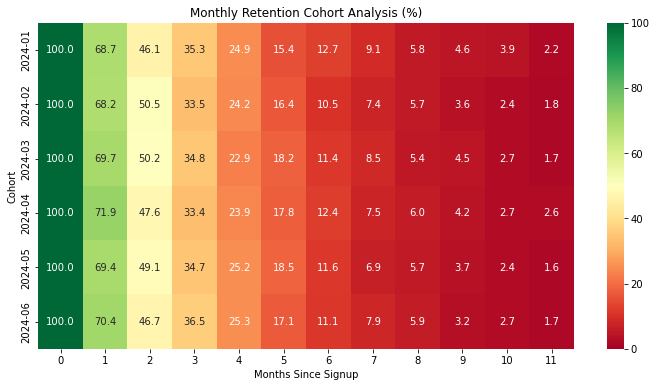

Average retention by month:
months_since_signup
0     100.0
1      69.7
2      48.3
3      34.7
4      24.4
5      17.2
6      11.6
7       7.9
8       5.8
9       4.0
10      2.8
11      1.9
dtype: float64


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
n_users = 10000
cohorts = pd.date_range('2024-01', periods=6, freq='M')

data = []
for cohort in cohorts:
    cohort_size = np.random.randint(1500, 2500)
    for user_id in range(cohort_size):
        signup_date = cohort
        # Simulate activity with decay
        for month in range(12):
            if np.random.random() < 0.8 * (0.7 ** month):
                data.append({
                    'user_id': f'{cohort.strftime("%Y%m")}_{user_id}',
                    'cohort': cohort.strftime('%Y-%m'),
                    'activity_month': (cohort + pd.DateOffset(months=month)).strftime('%Y-%m'),
                    'months_since_signup': month
                })

df = pd.DataFrame(data)

# Calculate retention matrix
retention_matrix = df.pivot_table(
    index='cohort',
    columns='months_since_signup',
    values='user_id',
    aggfunc='nunique'
)

# Get cohort sizes
cohort_sizes = df[df['months_since_signup']==0].groupby('cohort')['user_id'].nunique()

# Calculate retention rates
retention_rates = retention_matrix.divide(cohort_sizes, axis=0) * 100

# Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(retention_rates, annot=True, fmt='.1f', cmap='RdYlGn', vmin=0, vmax=100)
plt.title('Monthly Retention Cohort Analysis (%)')
plt.ylabel('Cohort')
plt.xlabel('Months Since Signup')
plt.show()

print("Average retention by month:")
print(retention_rates.mean().round(1))